In [1]:
import os
import re
from collections import defaultdict

from langdetect import detect
import pandas as pd

data = defaultdict(lambda: {'topic': '', 'content': '', 'messages': []})

for file_path in os.listdir("cleaned_intercom_messages"):
    csv = pd.read_csv("cleaned_intercom_messages/" + file_path)
    csv = csv[csv['clean_body'].notna()]
    bodies = csv["clean_body"]
    ids = csv["key_intercomconversation"]
    for id, body in zip(ids, bodies):
        m = re.search(" Selected category: (.+) Content: (.+) uid:", body)
        if m is not None:
            data[id]['topic'] = m.group(1)
            data[id]['content'] = m.group(2)
        else:
            data[id]['messages'].append(body)

df = pd.DataFrame.from_dict(data, orient="index")
print(len(df[df["topic"] == '']))
print(len(df[df["topic"] != '']))


273417
10


In [4]:
# For initial statistics and preprocessing, we are going to choose a subset
# of the initial data to save time. We are going to use 10'000 messages out
# of 273'417.

testdf = df[:10000]

In [8]:
from collections import defaultdict

total = 0

dictio = defaultdict(int)

for i in testdf[testdf["topic"] == '']['messages']:
    message_as_string = ' '.join(i)
    try:
        dictio[detect(message_as_string)] += 1
    except:
        continue
    total += 1

In [41]:
from matplotlib import pyplot as plt
import numpy as np

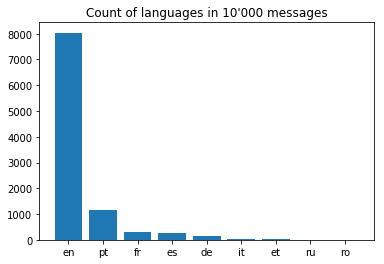

In [101]:
df_languages = pd.DataFrame.from_dict(dictio, orient="index", columns=['count'])


df_languages = df_languages[df_languages['count']>=10]
df_languages = df_languages.sort_values('count', ascending=False)
plt.bar(range(len(df_languages.index)), df_languages['count'], tick_label=df_languages.index)
plt.title("Count of languages in 10'000 messages")

plt.show()


In [113]:
print("Percentage of English conversations based on first 10'000 messages: {}".format(df_languages['count']['en']/total))

Percentage of English conversations based on first 10'000 messages: 0.8039607921584316


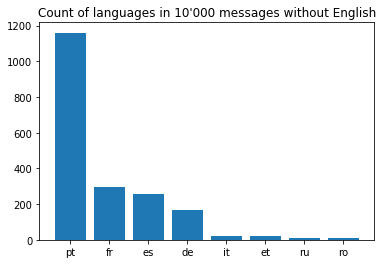

In [107]:
df_lang_without_en = df_languages[df_languages.index != 'en']

plt.bar(range(len(df_lang_without_en.index)), df_lang_without_en['count'], tick_label=df_lang_without_en.index)
plt.title("Count of languages in 10'000 messages without English")

plt.show()